# Section 2.3 — Inventory of discrete distributions

This notebook contains all the code examples from [Section 2.3 Inventory of discrete distributions](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=65) of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# Ensure required Python modules are installed
%pip install --quiet numpy scipy seaborn ministats

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load Python modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from ministats import plot_pmf

In [4]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (6,2)},
)
%config InlineBackend.figure_format = "retina"

<Figure size 640x480 with 0 Axes>

In [5]:
# Simple float __repr__  
import numpy as np
if int(np.__version__.split(".")[0]) >= 2:
    np.set_printoptions(legacy='1.25')

# set random seed for repeatability
np.random.seed(42)

## Discrete uniform distribution

In [6]:
from scipy.stats import randint

alpha = 1
beta = 4
rvR = randint(alpha, beta+1)

Note the `+1` we added to the second argument.

In [7]:
rvR.mean()

2.5

In [8]:
rvR.var()

1.25

The limits of the sample space of the random variable `rvR`
can be obtained by calling its `.support()` method.

#### Probability mass function

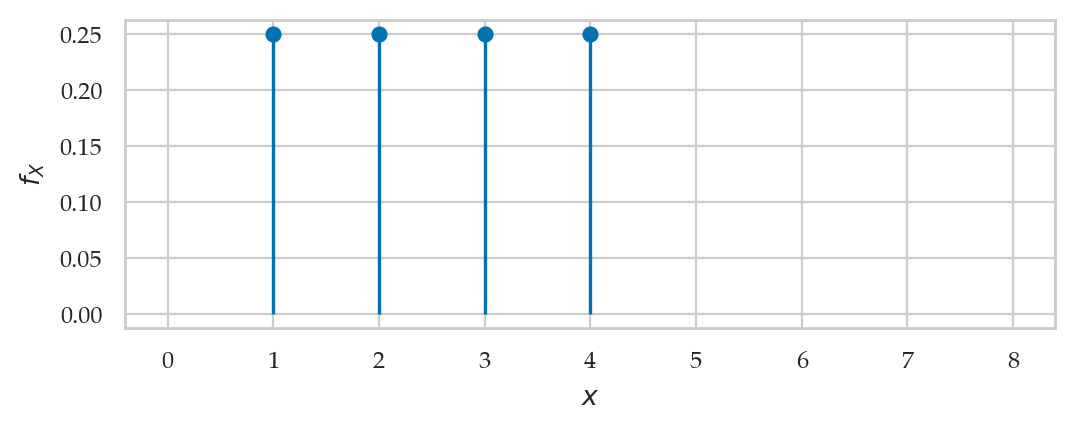

In [9]:
plot_pmf(rvR, xlims=[0,8+1]);

In [10]:
rvR.support()

(1, 4)

## Bernoulli distribution

In [11]:
from scipy.stats import bernoulli

rvB = bernoulli(p=0.3)

In [12]:
rvB.support()

(0, 1)

In [13]:
rvB.mean(), rvB.var()

(0.3, 0.21)

In [14]:
rvB.rvs(10)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

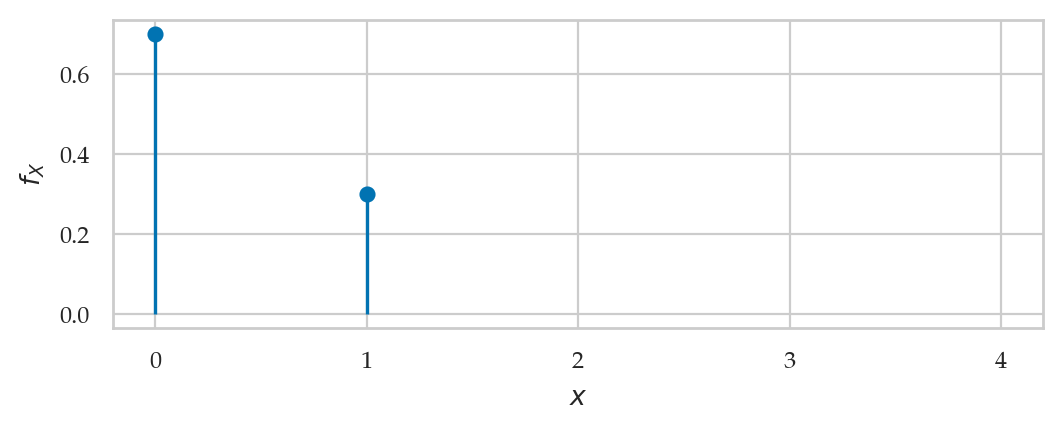

In [15]:
plot_pmf(rvB, xlims=[0,5]);

## Mathematical interlude: counting combinations

### Factorials

TODO explain + math formula

In [16]:
from scipy.special import factorial

factorial(4)

24.0

In [17]:
# # ALT.
# from math import factorial
# factorial(4)

The factorial of $0$ is defined as 1: $0!=1$.

In [18]:
factorial(0)

1.0

The factorial function grows grows very quickly:

In [19]:
[factorial(n) for n in [5, 6, 7, 8, 9, 10, 11, 12, 13]]

[120.0,
 720.0,
 5040.0,
 40320.0,
 362880.0,
 3628800.0,
 39916800.0,
 479001600.0,
 6227020800.0]

### Combinations

TODO explain + math formula

In [20]:
from scipy.special import comb

comb(5, 2)

10.0

In [21]:
from itertools import combinations

list(combinations({1,2,3,4,5}, 2))

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

### Exercises

In [22]:
from scipy.special import comb

comb(12,6)

924.0

In [23]:
from scipy.special import comb

comb(52,5)

2598960.0

### Links

- https://en.wikipedia.org/wiki/Factorials
- https://en.wikipedia.org/wiki/Combinations
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.factorial.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html
- https://docs.python.org/3/library/itertools.html#itertools.combinations



## Binomial distribution

We'll use the name `rvX` because `rvB` was already used for the Bernoulli random variable above.

In [24]:
from scipy.stats import binom

n = 20
p = 0.14
rvX = binom(n,p)

In [25]:
rvX.support()

(0, 20)

In [26]:
rvX.mean(), rvX.var()

(2.8000000000000003, 2.4080000000000004)

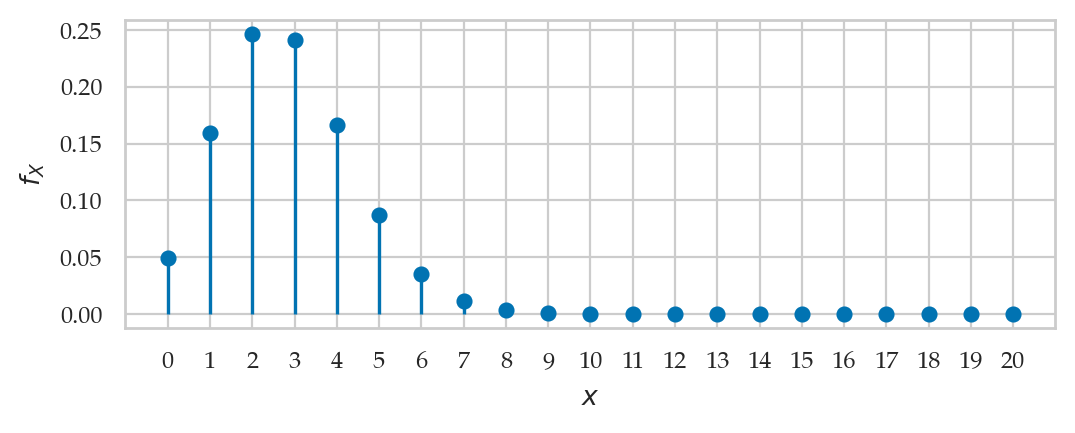

In [27]:
plot_pmf(rvX, xlims=[0,21]);

## Poisson distribution


In [28]:
from scipy.stats import poisson
lam = 10
rvP = poisson(lam)

In [29]:
rvP.pmf(8)

0.11259903214902009

In [30]:
rvP.cdf(8)

0.3328196787507191

In [31]:
## ALT. way to compute the value F_P(8) =
# sum([rvP.pmf(x) for x in range(0,8+1)])

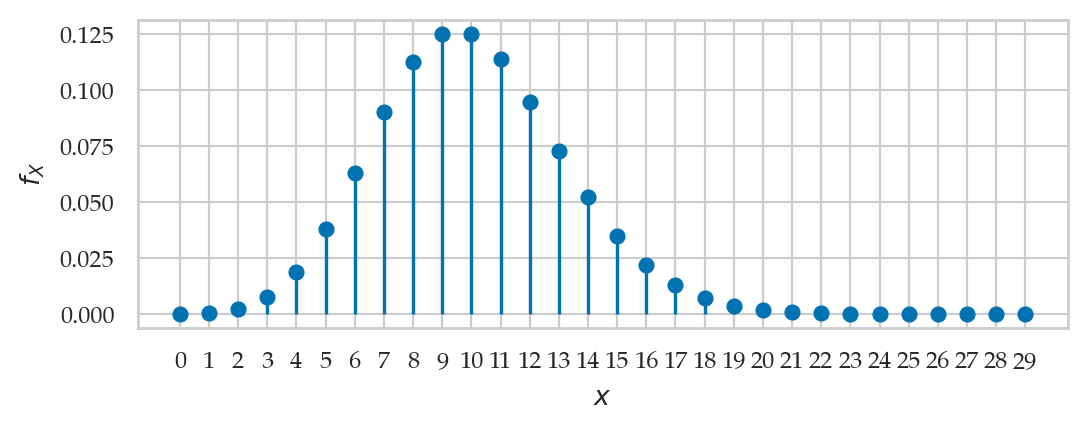

In [32]:
plot_pmf(rvP, xlims=[0,30]);

## Geometric distribution

In [33]:
from scipy.stats import geom

rvG = geom(p = 0.2)

In [34]:
rvG.support()

(1, inf)

In [35]:
rvG.mean(), rvG.var()

(5.0, 20.0)

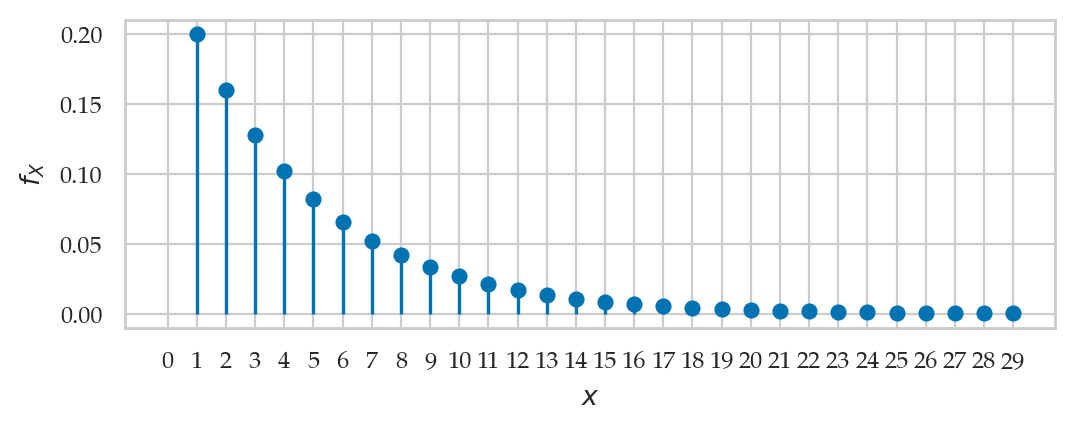

In [36]:
plot_pmf(rvG, xlims=[0,30]);

## Negative binomial distribution

In [37]:
from scipy.stats import nbinom

r = 10
p = 0.5
rvN = nbinom(r,p)

In [38]:
rvN.support()

(0, inf)

In [39]:
rvN.mean(), rvN.var()

(10.0, 20.0)

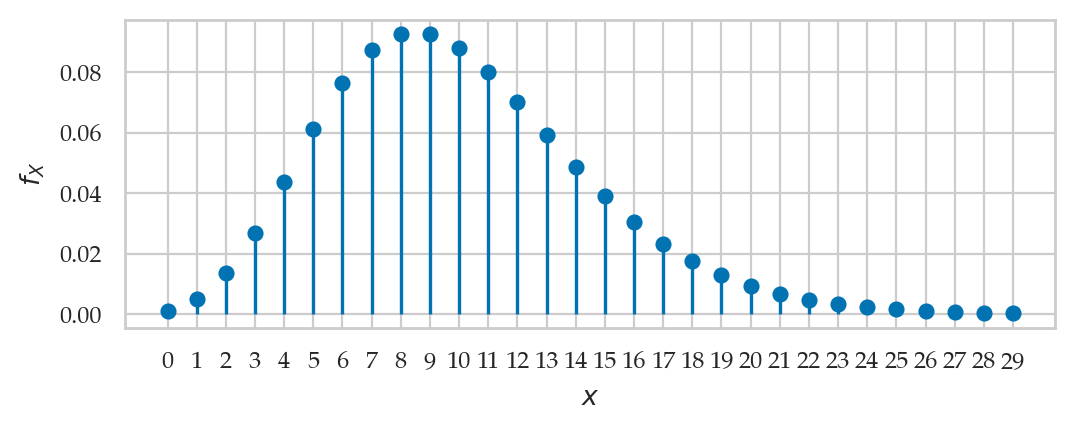

In [40]:
plot_pmf(rvN, xlims=[0,30]);

## Computer models for discrete distributions

TODO table models

TODO table methods

### Building computer models for random variables

In [41]:
# import the model family
from scipy.stats import randint

# choose parameters
alpha = 1  # start at 1
beta = 4   # stop at 4

# create the rv object
rvR = randint(alpha, beta+1)

Note the `+1` we added to the second argument.

In [42]:
rvR.mean()

2.5

In [43]:
# verify using formula
(alpha + beta) / 2

2.5

In [44]:
rvR.var()

1.25

In [45]:
# verify using formula
((beta + 1 - alpha)**2 - 1) / 12

1.25

In [46]:
rvR.std()

1.118033988749895

The limits of the sample space of the random variable `rvR`
can be obtained by calling its `.support()` method.

In [47]:
rvR.support()

(1, 4)

### Probability calculations

In [48]:
rvR.pmf(1) + rvR.pmf(2) + rvR.pmf(3)

0.75

In [49]:
[rvR.pmf(r) for r in range(1,3+1)]

[0.25, 0.25, 0.25]

In [50]:
sum([rvR.pmf(r) for r in range(1,3+1)])

0.75

In [51]:
rvR.cdf(3)

0.75

### Plotting distributions

##### Probability mass function

To create a stem-plot of the probability mass function $f_R$,
we can use the following three-step procedure:

1. Create a range of inputs `rs` for the plot.
2. Compute the value of $f_R =$ `rvR` for each of the inputs
   and store the results as list of values `fRs`.
4. Plot the values `fRs` by calling the function `plt.stem(rs, fRs)`.

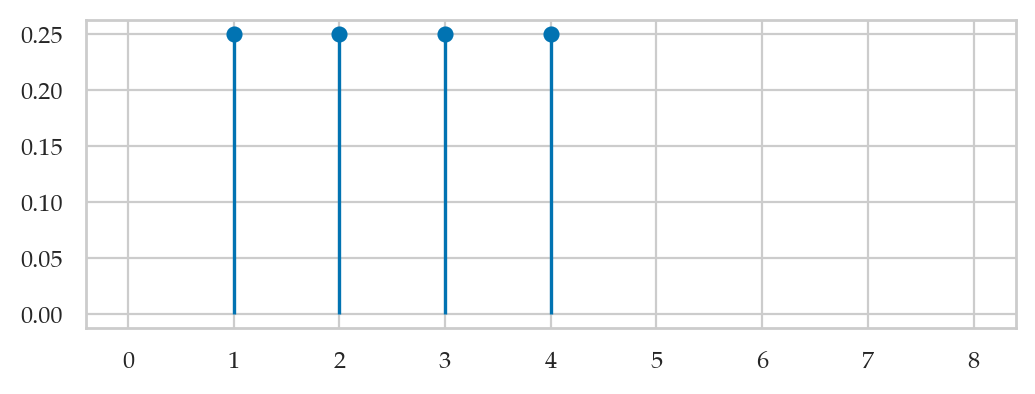

In [52]:
import matplotlib.pyplot as plt

rs = range(0, 8+1)
fRs = rvR.pmf(rs)
fRs = np.where(fRs == 0, np.nan, fRs)  # set zero fRs to np.nan
plt.stem(rs, fRs, basefmt=" ");

Note, we used the `np.where` statement
to replace zero entries in the list fRs
to  the special Not a Number (`np.nan`) values,
which excludes them from the plot.
This is arguably a cleaner representation of the PMF plot:
the function is only defined for the sample space $\mathcal{R} = \{1,2,3,4\}$.

An alternative ,,,

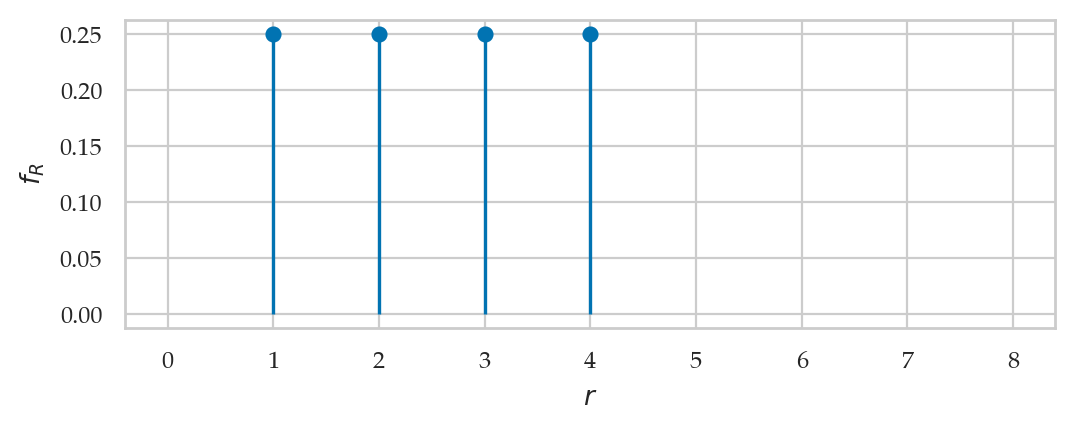

In [53]:
# ALT. using helper function
from ministats import plot_pmf

plot_pmf(rvR, xlims=[0,8+1], rv_name="R");

##### Cumulative distribution function

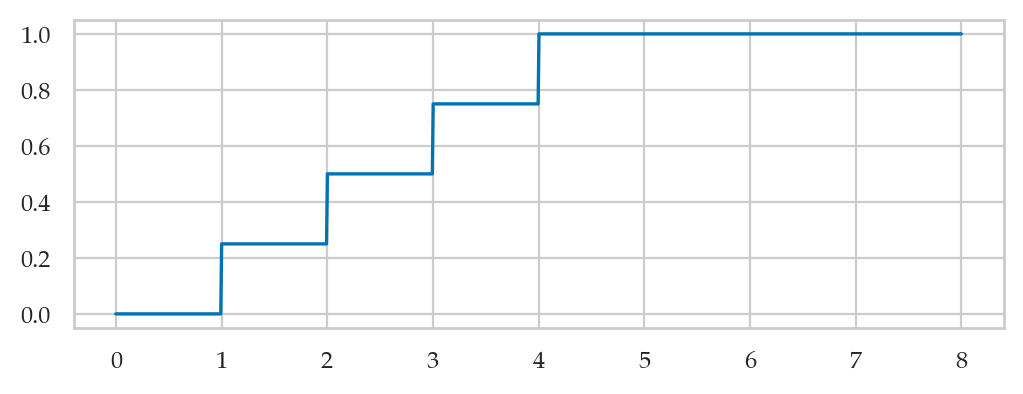

In [54]:
import numpy as np
import seaborn as sns

bs = np.linspace(0, 8, 1000)
FRs = rvR.cdf(bs)
sns.lineplot(x=bs, y=FRs);

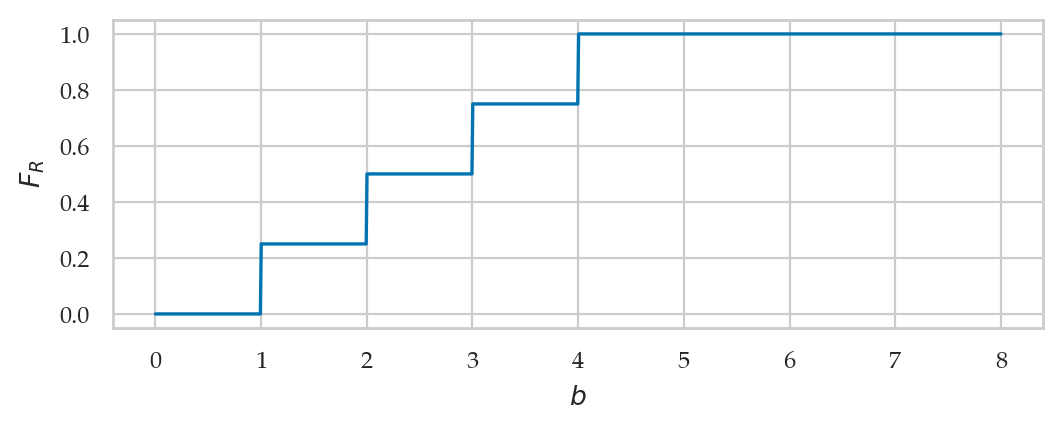

In [55]:
# ALT. using helper function
from ministats import plot_cdf

plot_cdf(rvR, xlims=[0,8], rv_name="R");

### Generating random observations

Let's generate 10 random observations from random variable `rvR`:

In [56]:
np.random.seed(43)

rvR.rvs(10)

array([1, 1, 4, 2, 2, 3, 1, 4, 2, 4])

## Explanations

### Binomial coefficient formula explained

In [57]:
n = 6
[int(comb(n,k)) for k in range(0,n+1)]

[1, 6, 15, 20, 15, 6, 1]

We can draw [Pascal's triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle)
by by repeating the above calculation for several values of `n`.

In [58]:
for n in range(0,10):
    row_ints = [int(comb(n,k)) for k in range(0,n+1)]
    row_str = str(row_ints)
    row_str = row_str.replace("[","").replace("]","").replace(",", "  ")
    row_str = row_str.center(60)
    print(row_str)

                             1                              
                           1   1                            
                         1   2   1                          
                       1   3   3   1                        
                     1   4   6   4   1                      
                  1   5   10   10   5   1                   
                1   6   15   20   15   6   1                
             1   7   21   35   35   21   7   1              
           1   8   28   56   70   56   28   8   1           
       1   9   36   84   126   126   84   36   9   1        


### Geometric sums

In [59]:
r = 0.3
sum([r**n for n in range(0,100)])

1.4285714285714286

In [60]:
1 / (1 - r)

1.4285714285714286

## Discussion

### Relations between distributions

## Exercises

### Exercise XX

In [61]:
from scipy.stats import poisson
lam = 20
rvH = poisson(lam)

In [62]:
# a) Pr(H in {20,21,22}) 
rvH.pmf(20) + rvH.pmf(21) + rvH.pmf(22)

0.2503540762867841

In [63]:
# b) Pr({16≤H≤24})
rvH.cdf(24) - rvH.cdf(16-1)

0.6867142435340193

In [64]:
# c) F_H^{-1}(0.95)
rvH.ppf(0.95)

28.0

## Links